# Slides for BBQ talk
We graph the latest data, the history of the reports, and the changes over time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../case-hosp-death.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-02-29,1,14,0
2020-03-01,1,4,0
2020-03-02,0,23,0
2020-03-03,2,22,0
2020-03-04,5,22,0


# Latest report
We generate a bar chart of the new cases/day.  Since there's weekly cyclicity, we also graph the 7 day rolling average.  The latter allows one to better see trends.  But the analysis is hampered by reporting delays - many sites don't promptly report the data.

/home/hjstein/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


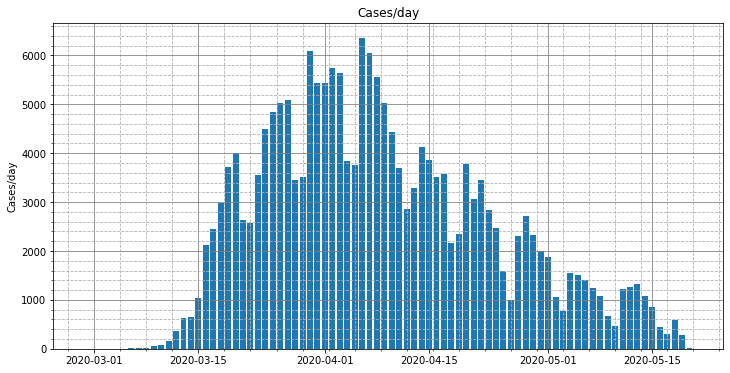

In [5]:
fig, ax = pltdflt(figsize=(12,6))
ax.bar(dat.index, dat["NEW_COVID_CASE_COUNT"])
# plt.grid(False, which="minor")
plt.ylabel("Cases/day")
plt.title("Cases/day")
plt.savefig("whatTheyTellYou.png")

In [6]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [7]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [8]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

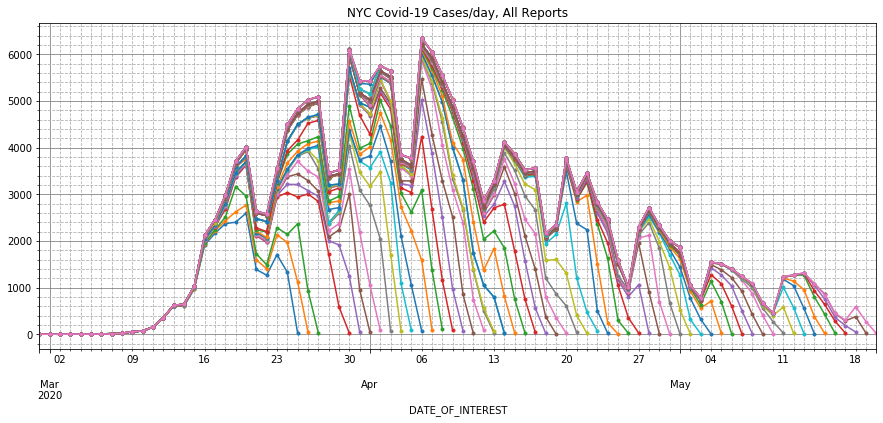

In [9]:
fig, ax = pltdflt((15,6))
dp.plot(style=".-", ax=ax, legend=None)

#ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, All Reports")
plt.savefig("theFullStory.png", bbox_inches="tight")

In [10]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="NEW_COVID_CASE_COUNT")

In [11]:
rptdates = sorted(hdat["AS_OF"].unique())

casesPerDay2020-04-06T18_05_54.000000000.png


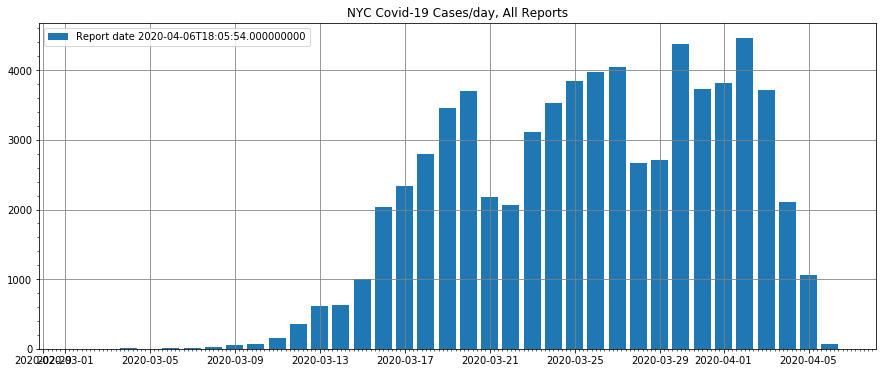

casesPerDay2020-04-07T17_52_37.000000000.png


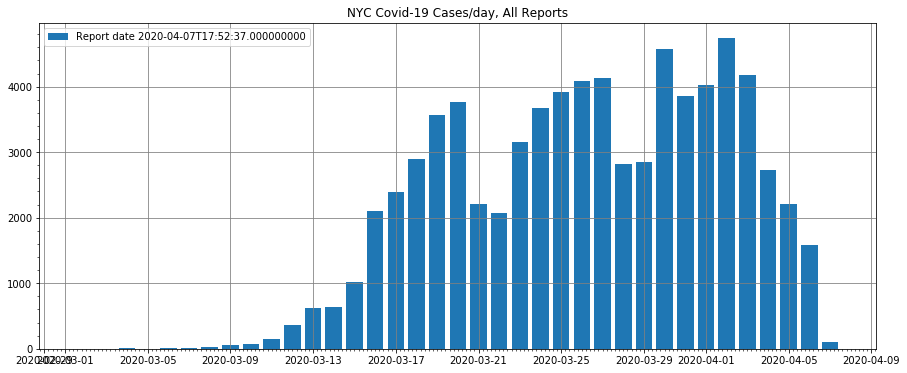

casesPerDay2020-04-08T18_03_33.000000000.png


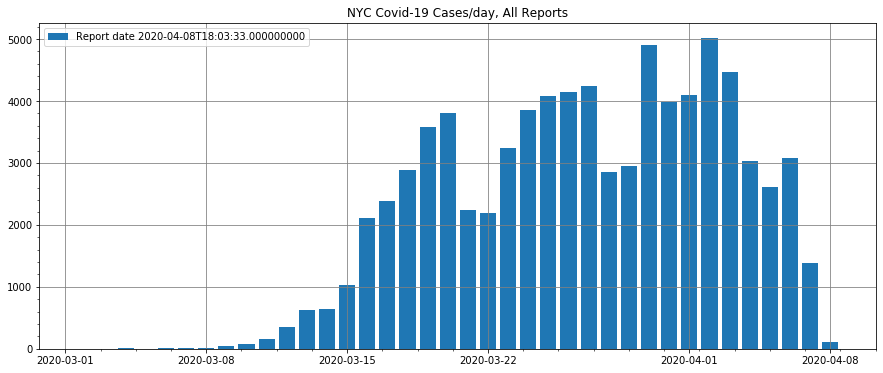

casesPerDay2020-04-09T17_31_46.000000000.png


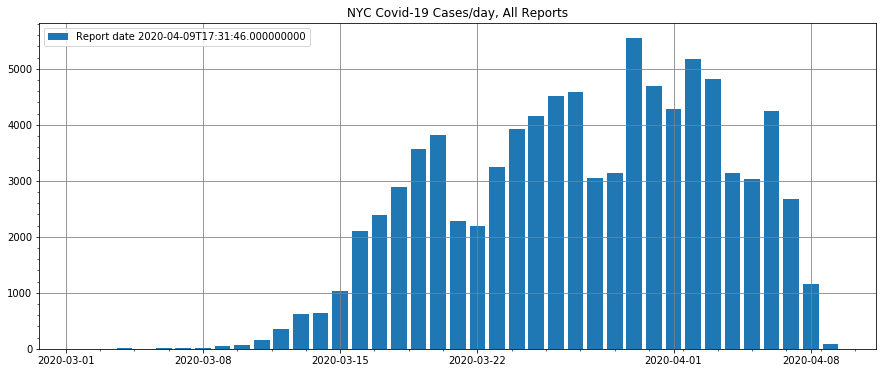

casesPerDay2020-04-10T17_41_39.000000000.png


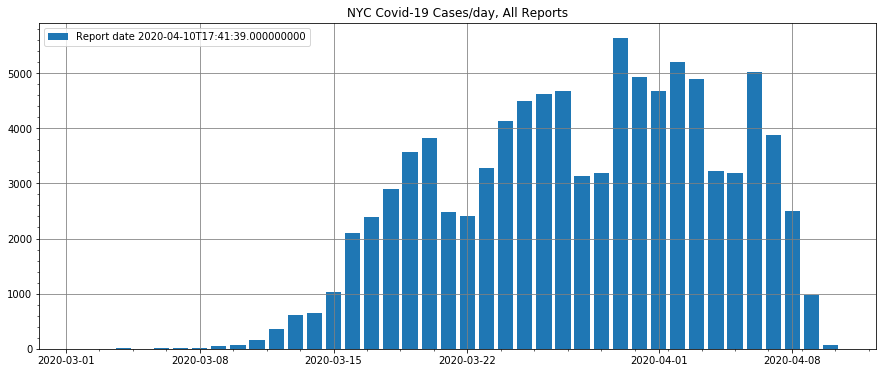

casesPerDay2020-04-11T17_36_46.000000000.png


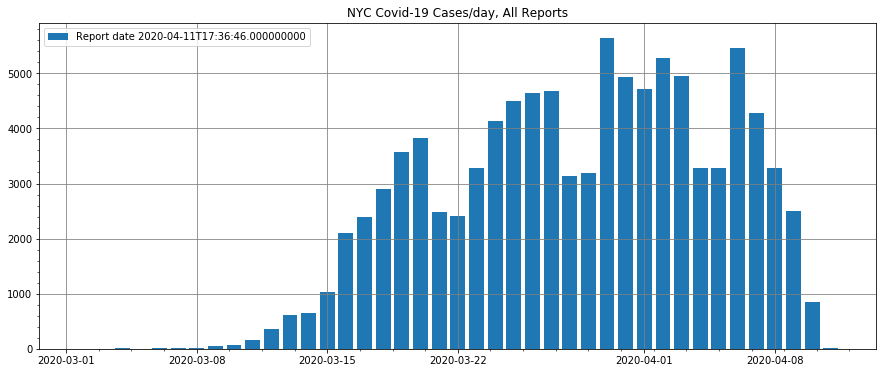

In [12]:
for dateidx in [10, 11, 12, 13, 14, 15]:
    dt = rptdates[dateidx]

    fn = f"casesPerDay{dt}.png".replace(":", "_")
    print(fn)
    fig, ax = pltdflt((15,6))
    dat = dp[[dt]].dropna()
    ax.bar(dat.index, dat[dt])
    plt.grid(False, which="minor")
    ax.legend([f"Report date {dt}"], loc="upper left")
    plt.title("NYC Covid-19 Cases/day, All Reports")
    plt.savefig(fn, bbox_inches="tight")
    plt.show()

In [13]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg")

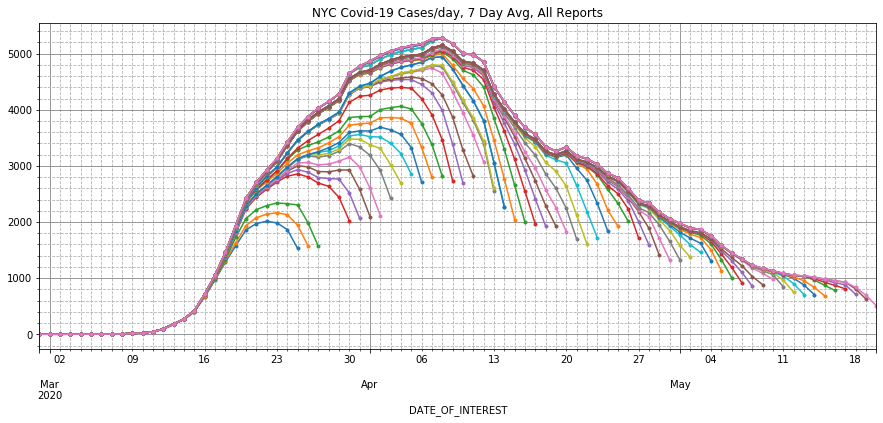

In [14]:
fig, ax = pltdflt((15, 6))
dp.plot(style=".-", ax=ax, legend=None)
# ax.legend(loc="upper left")
plt.title("NYC Covid-19 Cases/day, 7 Day Avg, All Reports")
plt.savefig("fullNYCSmoothed.png", bbox_inches="tight")

# Copy over slides from OWID repo

In [15]:
from shutil import copy2
owidDir = "../../covid-19-data/scripts/notebooks/"
copy2(owidDir + "casesPerDayHistoryNoLegend.png", "USACasesPerDayHistoryNoLegend.png")
copy2(owidDir + "casesPerDayHistoryRawNoLegend.png", "USACasesPerDayHistoryRawNoLegend.png")

'USACasesPerDayHistoryRawNoLegend.png'